In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("cleaned_autos.csv")

In [4]:
pd.set_option('display.max_columns', None)
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,Other,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,grand,125000,Aug,Diesel,jeep,Other,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4


In [5]:
df.shape

(313687, 27)

In [6]:
df.vehicleType.unique()

array(['Other', 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio',
       'kombi', 'bus', 'andere'], dtype=object)

## Variation of the price range by the vehicle type

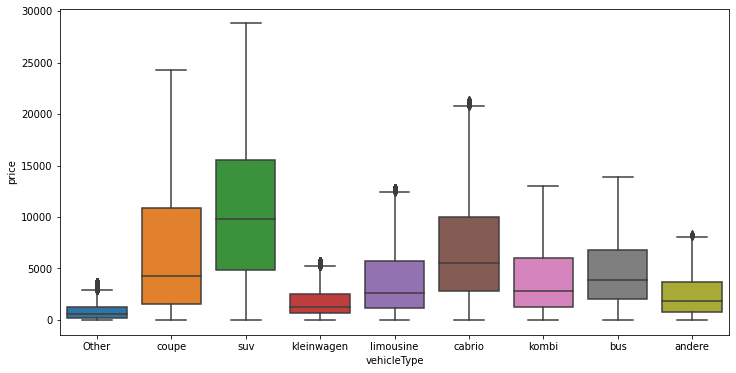

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x="vehicleType", y="price", data=df)
plt.show()

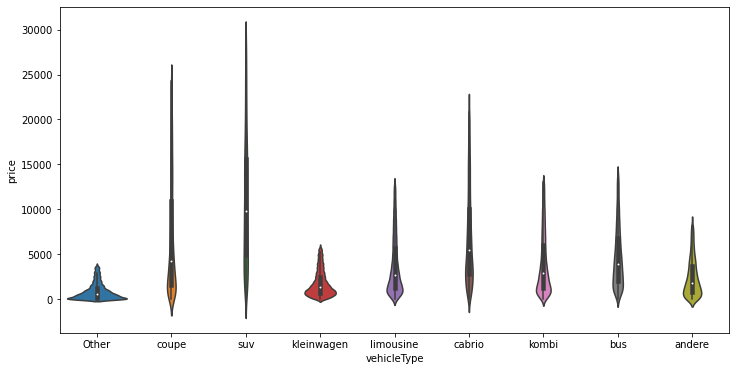

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x="vehicleType", y="price", data=df)
plt.show()

## Demonstration of the mean pricec by the vehicle type

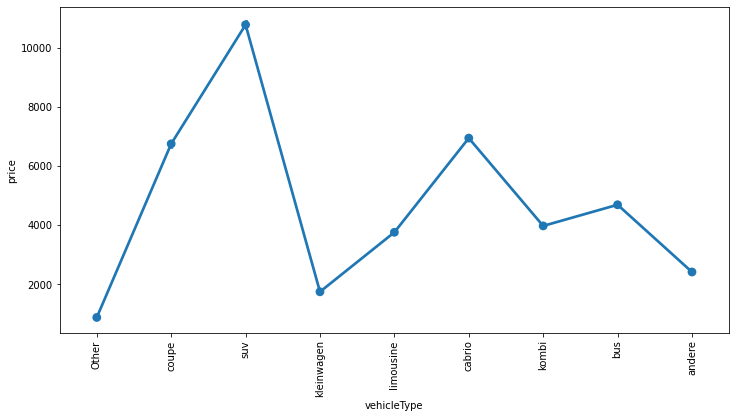

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x="vehicleType", y="price", data=df)
ax.set_xticklabels(df.vehicleType.unique(), rotation=90);

In [10]:
df.groupby("vehicleType").price.mean().sort_values()

vehicleType
Other           861.466447
kleinwagen     1730.123085
andere         2400.906465
limousine      3745.179122
kombi          3961.032129
bus            4677.360601
coupe          6741.053960
cabrio         6934.699382
suv           10772.809349
Name: price, dtype: float64

In [11]:
df.groupby("vehicleType").price.mean().sort_values().index

Index(['Other', 'kleinwagen', 'andere', 'limousine', 'kombi', 'bus', 'coupe',
       'cabrio', 'suv'],
      dtype='object', name='vehicleType')

In [12]:
df.groupby("vehicleType").price.mean().sort_values().values

array([  861.46644727,  1730.12308535,  2400.90646492,  3745.17912152,
        3961.03212891,  4677.36060075,  6741.05395981,  6934.69938199,
       10772.80934855])

In [13]:
order = df.groupby("vehicleType").price.mean().sort_values().index

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

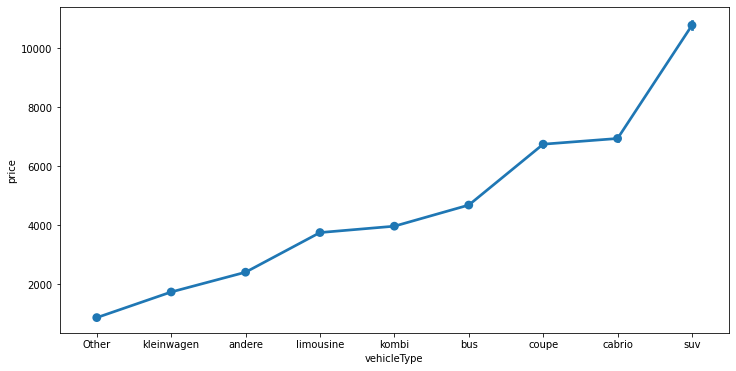

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x="vehicleType", y="price", order = order, data=df)

C:\Users\acer\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='vehicleType'>

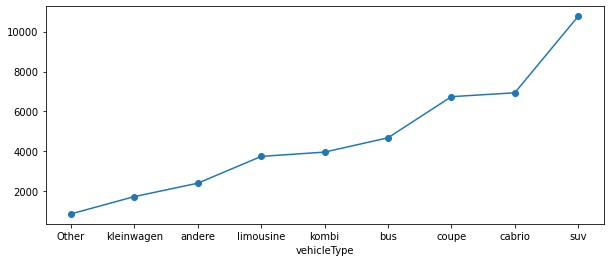

In [15]:
df.groupby("vehicleType").price.mean().sort_values().plot(marker ="o", figsize = (10,4))

## Total count of vehicles by type available on ebay for sale

<AxesSubplot:xlabel='vehicleType', ylabel='count'>

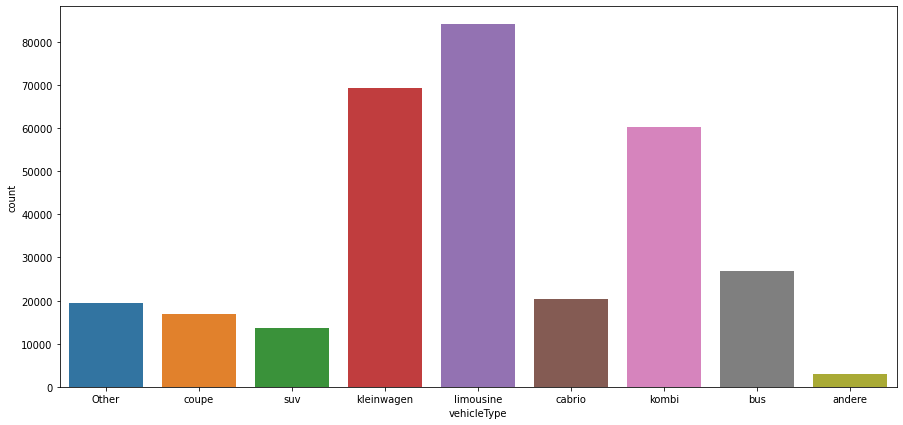

In [16]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(df.vehicleType)

<AxesSubplot:xlabel='vehicleType', ylabel='count'>

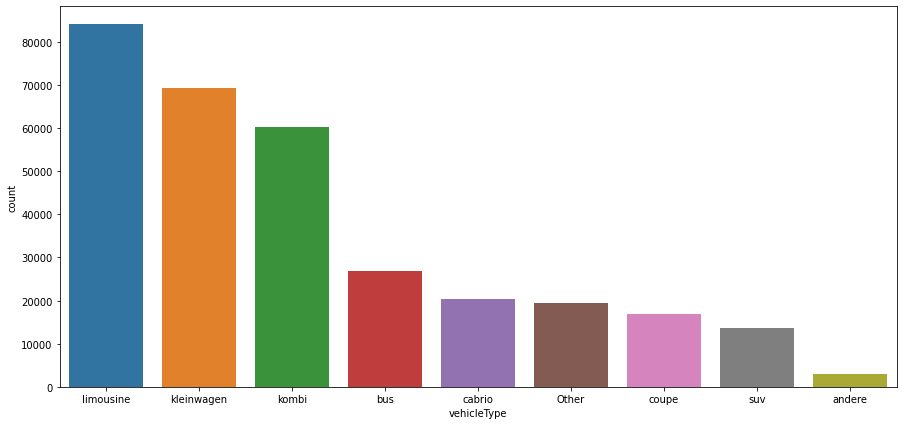

In [18]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(df.vehicleType, order=df.vehicleType.value_counts().index)

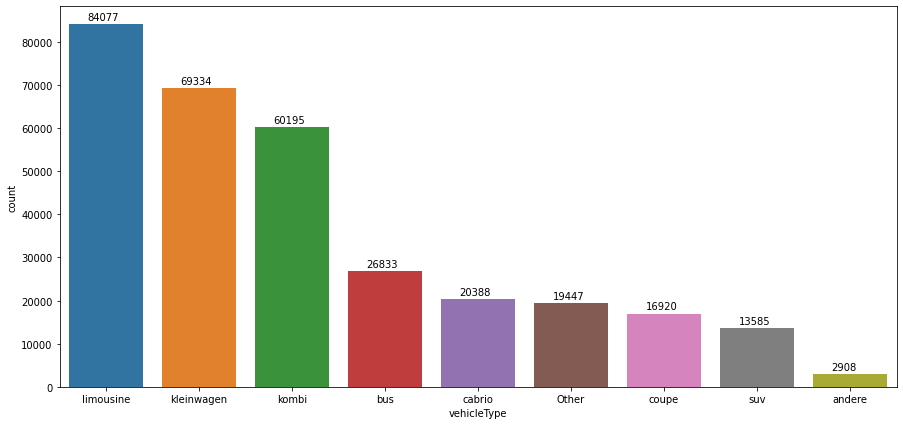

In [19]:
fig, ax = plt.subplots(figsize=(15, 7))
g = sns.countplot(df.vehicleType, order=df.vehicleType.value_counts().index)

for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+1000))

<AxesSubplot:>

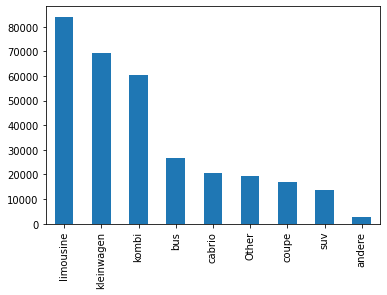

In [20]:
#pandas
df.vehicleType.value_counts().plot.bar()

In [21]:
x = df.vehicleType.value_counts()

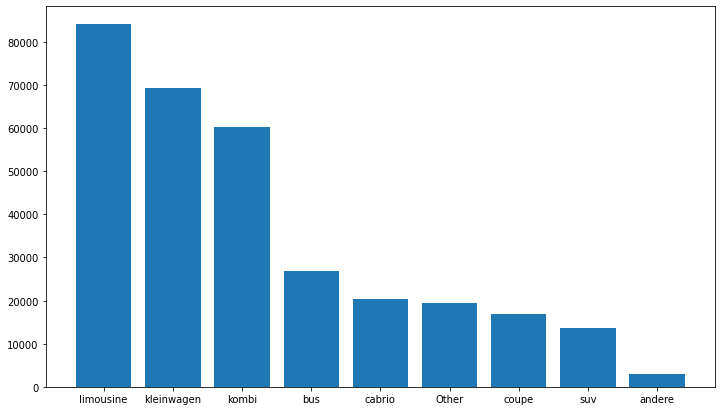

In [22]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x.index, x.values);

### No of Vehicles by Brand Available on ebay for sale 

In [23]:
df.head(1)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11


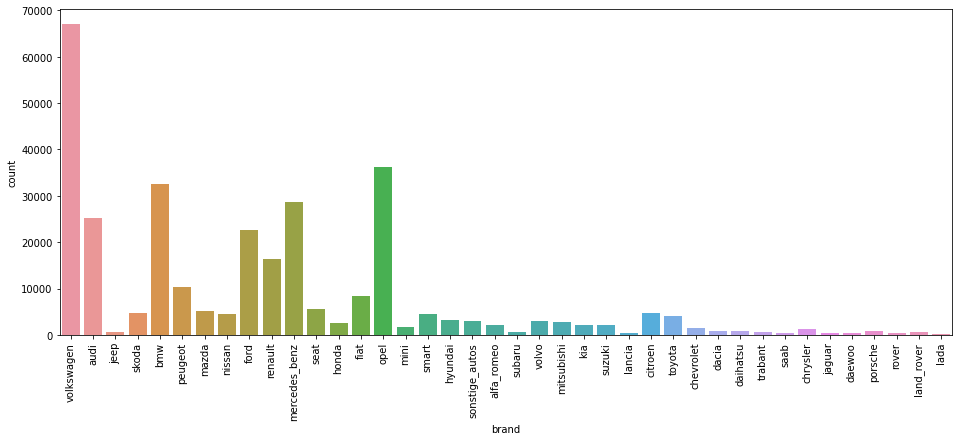

In [24]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot("brand", data = df)
ax.set_xticklabels(df.brand.unique(), rotation=90);

fig, ax = plt.subplots(figsize=(16,6))
df.brand.value_counts().plot()
ax.set_xticklabels(df.brand.unique(), rotation=90);

### Average price for vehicles based on the type of vehicle as well as on the type of gearbox

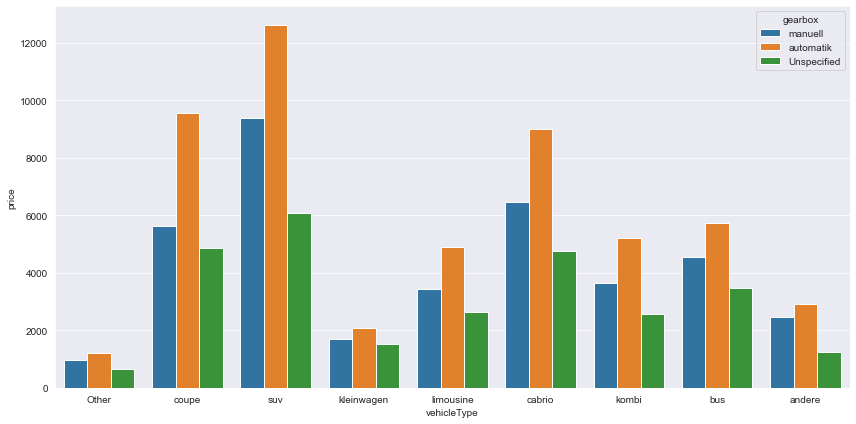

In [31]:
plt.figure(figsize = (12,6))
sns.barplot(x="vehicleType", y="price", hue="gearbox", data=df, ci=None)
plt.tight_layout()

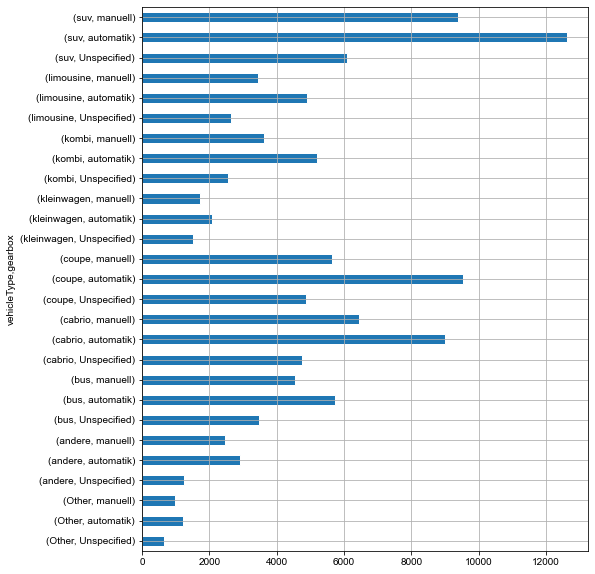

In [26]:
fig, ax = plt.subplots(figsize=(8,10))
sns.set_style("darkgrid")
df.groupby(["vehicleType", "gearbox"]).price.mean().plot.barh();

### Average price of vehicle by fuel type as well as on the type of gearbox

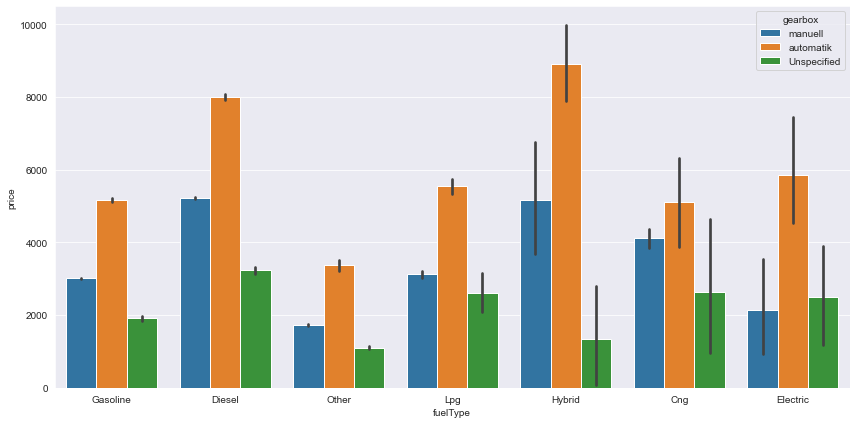

In [29]:
plt.figure(figsize = (12,6))
sns.barplot(x = "fuelType", y = "price", hue ="gearbox", data = df, ci = None)
plt.tight_layout()

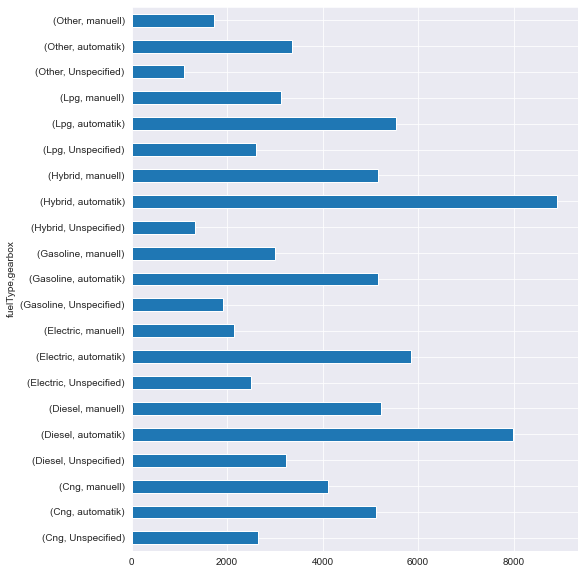

In [27]:
fig, ax = plt.subplots(figsize=(8,10))
sns.set_style("darkgrid")
df.groupby(["fuelType", "gearbox"]).price.mean().plot.barh();

### Average price of vehicles by vehicle type and brand (heatmap) (first: groupby method, then: pivot table, finally heatmap)

In [37]:
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


In [39]:
tri = trial.pivot("brand","vehicleType", "avgPrice")
tri.head()

vehicleType,Other,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,,
alfa_romeo,669,962,0,7035,5265,1867,3312,2600,0
audi,1012,2685,3485,9655,11242,2582,5442,3829,18644
bmw,896,1720,4064,8613,6375,1575,5030,4838,12868
chevrolet,1250,3059,5188,10590,9991,2588,4143,4944,9613
chrysler,915,2919,2395,4160,8194,1666,3930,3191,5888


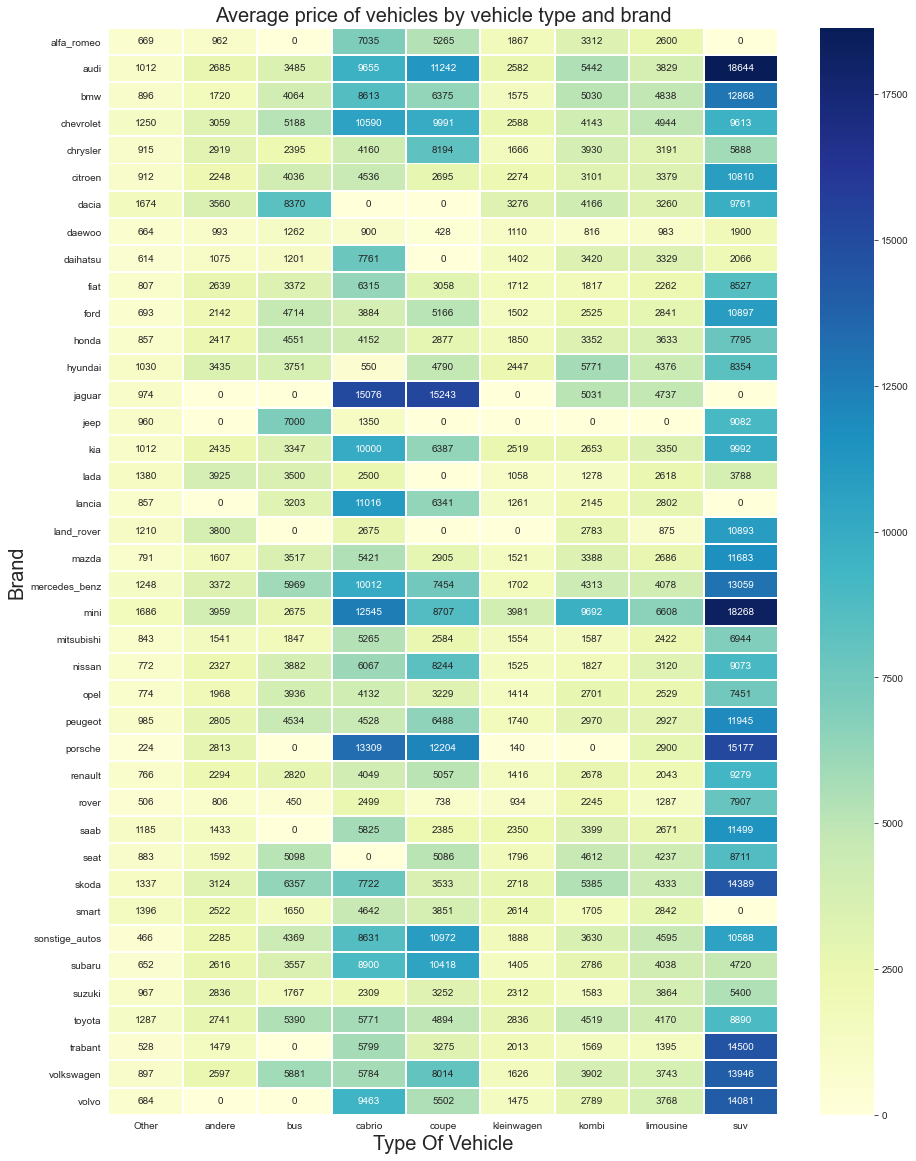

In [38]:
# HeatMap tp show average prices of vehicles by brand and type together
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Average price of vehicles by vehicle type and brand",fontdict={'size':20})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':20})
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})
plt.show()

In [46]:
aaa = df.groupby(["vehicleType", "brand"]).price.mean()
aaa

vehicleType  brand     
Other        alfa_romeo      669.805556
             audi           1012.599251
             bmw             896.748086
             chevrolet      1250.135593
             chrysler        915.701299
                               ...     
suv          suzuki         5400.337766
             toyota         8890.557173
             trabant       14500.000000
             volkswagen    13946.283675
             volvo         14081.237918
Name: price, Length: 333, dtype: float64

In [44]:
xxx = pd.DataFrame(df.groupby(["vehicleType", "brand"]).price.mean())

In [34]:
xxx

price
vehicleType brand                   
Other       alfa_romeo    669.805556
            audi         1012.599251
            bmw           896.748086
            chevrolet    1250.135593
            chrysler      915.701299
...                              ...
suv         suzuki       5400.337766
            toyota       8890.557173
            trabant     14500.000000
            volkswagen  13946.283675
            volvo       14081.237918

[333 rows x 1 columns]

In [35]:
xxx = xxx.pivot_table("price", "brand", "vehicleType")
xxx

vehicleType,Other,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,,
alfa_romeo,669.805556,962.500000,NaN,7035.727778,5265.458874,1867.865248,3312.968680,2600.240964,0.000000
audi,1012.599251,2685.311828,3485.000000,9655.285628,11242.325869,2582.206074,5442.982216,3829.821096,18644.243902
bmw,896.748086,1720.388393,4064.000000,8613.779584,6375.995227,1575.313070,5030.383186,4838.119115,12868.142412
chevrolet,1250.135593,3059.590909,5188.013699,10590.294118,9991.757895,2588.882239,4143.609524,4944.031818,9613.550505
chrysler,915.701299,2919.714286,2395.083333,4160.719665,8194.000000,1666.444444,3930.567686,3191.585455,5888.391304
citroen,912.367647,2248.972727,4036.490718,4536.408696,2695.552632,2274.683580,3101.815182,3379.148256,10810.540541
dacia,1674.875000,3560.000000,8370.729167,NaN,NaN,3276.289474,4166.642857,3260.578431,9761.972093
daewoo,664.204082,993.800000,1262.777778,900.000000,428.625000,1110.324627,816.340426,983.981308,1900.000000
daihatsu,614.675676,1075.000000,1201.500000,7761.000000,NaN,1402.864245,3420.294118,3329.543478,2066.918367


<AxesSubplot:xlabel='vehicleType', ylabel='brand'>

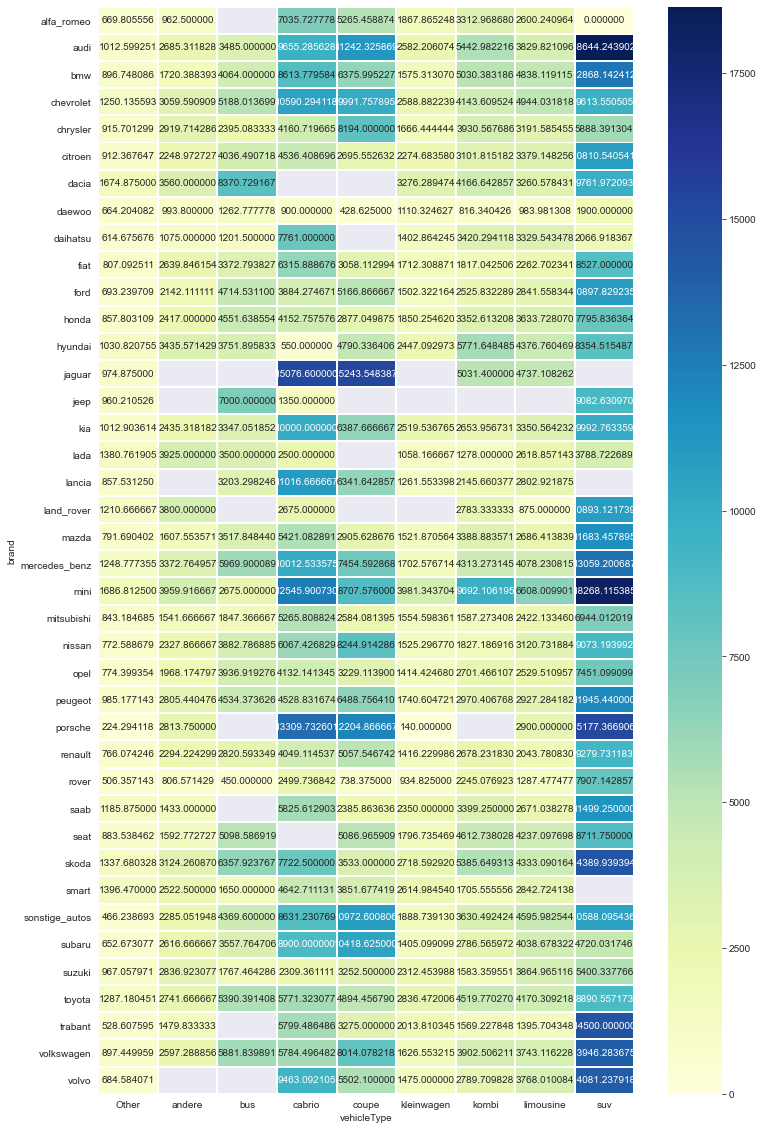

In [41]:
fig, ax = plt.subplots(figsize=(12,20))
sns.heatmap(xxx,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="f")
#sns.heatmap(xxx, cmap="coolwarm");

### Avg price of car by most common 15 years (or in last 15 years)

In [ ]:
df["dateCrawled"] =pd.to_datetime(df.dateCrawled)

In [ ]:
df.dateCrawled.dtype

In [ ]:
df.set_index('dateCrawled', inplace=True)

In [ ]:
df.head(1)

In [ ]:
df.index.year

In [ ]:
df.groupby(df.index.year).price.mean()